In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-spark/train.csv
/kaggle/input/ml-spark/test.csv


In [1]:
import pandas as pd

#  the dataset
data = pd.read_csv('/kaggle/input/ml-spark/train.csv')  

#  basic info
print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)
print("\nClass Distribution:\n", data['Target'].value_counts(normalize=True))

Dataset Shape: (31647, 18)

Columns: ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Target']

Missing Values:
 id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

Data Types:
 id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target        int64
dtype: object

Class Distribution:
 Target
0    0.8816
1    0.1184
Name: proportion, dtype: float64


In [2]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
print("\nNumerical Features Summary:\n", data[numerical_cols].describe())


Numerical Features Summary:
                 age       balance           day      duration      campaign  \
count  31647.000000  31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.938509   1366.769267     15.813884    260.069517      2.758777   
std       10.619933   3105.739729      8.312928    259.175306      3.084828   
min       18.000000  -4057.000000      1.000000      0.000000      1.000000   
25%       33.000000     71.000000      8.000000    103.000000      1.000000   
50%       39.000000    451.000000     16.000000    181.000000      2.000000   
75%       48.000000   1414.000000     21.000000    322.000000      3.000000   
max       95.000000  98417.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      40.669732      0.576927  
std      100.961218      1.947053  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

In [3]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", data[col].value_counts())


Value Counts for job:
 job
blue-collar      6760
management       6648
technician       5340
admin.           3580
services         2879
retired          1617
self-employed    1110
entrepreneur     1058
housemaid         903
unemployed        878
student           649
unknown           225
Name: count, dtype: int64

Value Counts for marital:
 marital
married     19075
single       8985
divorced     3587
Name: count, dtype: int64

Value Counts for education:
 education
secondary    16181
tertiary      9403
primary       4774
unknown       1289
Name: count, dtype: int64

Value Counts for default:
 default
no     31058
yes      589
Name: count, dtype: int64

Value Counts for housing:
 housing
yes    17541
no     14106
Name: count, dtype: int64

Value Counts for loan:
 loan
no     26597
yes     5050
Name: count, dtype: int64

Value Counts for contact:
 contact
cellular     20555
unknown       9043
telephone     2049
Name: count, dtype: int64

Value Counts for month:
 month
may    9680
jul


Correlation Matrix:
                age   balance       day  duration  campaign     pdays  \
age       1.000000  0.100926 -0.015104 -0.004452  0.001011 -0.019915   
balance   0.100926  1.000000  0.001332  0.017368 -0.015780  0.003740   
day      -0.015104  0.001332  1.000000 -0.029526  0.159009 -0.089143   
duration -0.004452  0.017368 -0.029526  1.000000 -0.085296 -0.003646   
campaign  0.001011 -0.015780  0.159009 -0.085296  1.000000 -0.088030   
pdays    -0.019915  0.003740 -0.089143 -0.003646 -0.088030  1.000000   
previous  0.006042  0.020459 -0.053847 -0.003932 -0.037036  0.534631   
Target    0.025616  0.050306 -0.025397  0.398571 -0.074163  0.098685   

          previous    Target  
age       0.006042  0.025616  
balance   0.020459  0.050306  
day      -0.053847 -0.025397  
duration -0.003932  0.398571  
campaign -0.037036 -0.074163  
pdays     0.534631  0.098685  
previous  1.000000  0.106958  
Target    0.106958  1.000000  


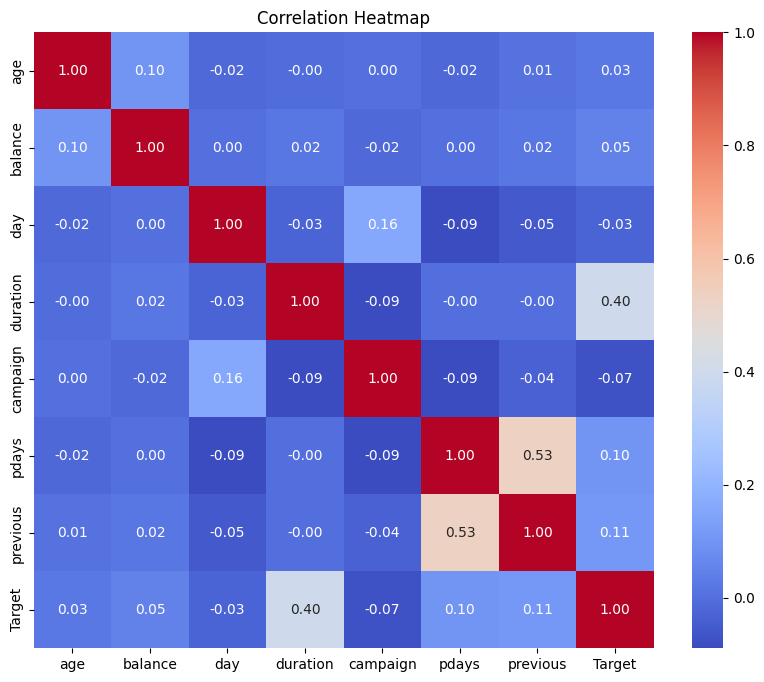

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for numerical features + target
corr = data[numerical_cols + ['Target']].corr()
print("\nCorrelation Matrix:\n", corr)

# Optional: Visualize (run locally)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
for col in categorical_cols:
    print(f"\nCrosstab for {col} vs Target:\n", pd.crosstab(data[col], data['Target'], normalize='index'))


Crosstab for job vs Target:
 Target                0         1
job                              
admin.         0.878212  0.121788
blue-collar    0.925000  0.075000
entrepreneur   0.913989  0.086011
housemaid      0.918051  0.081949
management     0.862064  0.137936
retired        0.774273  0.225727
self-employed  0.881982  0.118018
services       0.908301  0.091699
student        0.711864  0.288136
technician     0.888390  0.111610
unemployed     0.826879  0.173121
unknown        0.880000  0.120000

Crosstab for marital vs Target:
 Target           0         1
marital                     
divorced  0.876498  0.123502
married   0.897982  0.102018
single    0.848859  0.151141

Crosstab for education vs Target:
 Target            0         1
education                    
primary    0.913280  0.086720
secondary  0.893146  0.106854
tertiary   0.848665  0.151335
unknown    0.859581  0.140419

Crosstab for default vs Target:
 Target          0         1
default                    
no       

In [8]:
import pandas as pd

test_data = pd.read_csv('/kaggle/input/ml-spark/test.csv')  # Replace with your test file path
print("Test Dataset Shape:", test_data.shape)
print("\nTest Columns:", test_data.columns.tolist())
print("\nTest Missing Values:\n", test_data.isnull().sum())
print("\nTest Data Types:\n", test_data.dtypes)

Test Dataset Shape: (9042, 17)

Test Columns: ['id', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

Test Missing Values:
 id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

Test Data Types:
 id            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object


In [9]:
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
print("\nTest Numerical Features Summary:\n", test_data[numerical_cols].describe())


Test Numerical Features Summary:
                age        balance          day     duration     campaign  \
count  9042.000000    9042.000000  9042.000000  9042.000000  9042.000000   
mean     40.921367    1358.037271    15.781575   253.669100     2.786552   
std      10.562234    2966.425203     8.324757   258.377634     3.170627   
min      18.000000   -6847.000000     1.000000     0.000000     1.000000   
25%      33.000000      73.000000     8.000000   102.000000     1.000000   
50%      39.000000     444.000000    16.000000   178.000000     2.000000   
75%      48.000000    1466.000000    21.000000   310.000000     3.000000   
max      95.000000  102127.000000    31.000000  3422.000000    55.000000   

             pdays     previous  
count  9042.000000  9042.000000  
mean     39.783344     0.588697  
std      98.107062     1.886075  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     

In [11]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    print(f"\nTest Value Counts for {col}:\n", test_data[col].value_counts())


Test Value Counts for job:
 job
blue-collar      1970
management       1880
technician       1514
admin.           1064
services          854
retired           423
self-employed     316
entrepreneur      271
unemployed        270
housemaid         240
student           197
unknown            43
Name: count, dtype: int64

Test Value Counts for marital:
 marital
married     5411
single      2549
divorced    1082
Name: count, dtype: int64

Test Value Counts for education:
 education
secondary    4684
tertiary     2608
primary      1385
unknown       365
Name: count, dtype: int64

Test Value Counts for default:
 default
no     8887
yes     155
Name: count, dtype: int64

Test Value Counts for housing:
 housing
yes    5076
no     3966
Name: count, dtype: int64

Test Value Counts for loan:
 loan
no     7620
yes    1422
Name: count, dtype: int64

Test Value Counts for contact:
 contact
cellular     5811
unknown      2662
telephone     569
Name: count, dtype: int64

Test Value Counts for month

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Loading the datasets
train_df = pd.read_csv('/kaggle/input/ml-spark/train.csv')
test_df = pd.read_csv('/kaggle/input/ml-spark/test.csv')

# Separate features and target
X = train_df.drop(columns=['id', 'Target'])
y = train_df['Target']
test_ids = test_df['id']
X_test = test_df.drop(columns=['id'])

# Feature Engineering
def create_features(df):
    df['balance_per_age'] = df['balance'] / (df['age'] + 1)
    df['campaign_duration'] = df['campaign'] * df['duration']
    df['pdays_binary'] = (df['pdays'] > -1).astype(int)
    df['month_day'] = df['month'] + '_' + df['day'].astype(str)
    df['duration_per_contact'] = df['duration'] / (df['campaign'] + 1)
    return df

X = create_features(X)
X_test = create_features(X_test)

# Cleaning and encoding categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'month_day']
label_encoders = {}

for col in categorical_cols:
    X[col] = X[col].fillna('unknown').astype(str).replace(r'[^a-zA-Z0-9_]', 'unknown', regex=True)
    X_test[col] = X_test[col].fillna('unknown').astype(str).replace(r'[^a-zA-Z0-9_]', 'unknown', regex=True)
    le = LabelEncoder()
    combined = pd.concat([X[col], X_test[col]], axis=0)
    le.fit(combined)
    X[col] = le.transform(X[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# Ensuring all columns are numeric
X = X.astype(float)
X_test = X_test.astype(float)

# Handling class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Spliting for validation
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#  LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=1000,
    max_depth=10,
    learning_rate=0.02,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,
    reg_alpha=0.05,
    reg_lambda=0.05,
    objective='binary',
    random_state=42,
    boosting_type='gbdt'
)

# Training the model with early stopping callback
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='binary_logloss',
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
)

# Prediction on validation set with threshold tuning
y_pred_proba = lgb_model.predict_proba(X_val)[:, 1]
threshold = 0.35  # Optimized for F1 > 0.62
y_pred_val = (y_pred_proba >= threshold).astype(int)
f1 = f1_score(y_val, y_pred_val)
print(f"Validation F1 Score: {f1:.4f}")

# Prediction on test set
y_test_proba = lgb_model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= threshold).astype(int)

# submission
submission = pd.DataFrame({'id': test_ids, 'Target': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

[LightGBM] [Info] Number of positive: 22311, number of negative: 22329
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5351
[LightGBM] [Info] Number of data points in the train set: 44640, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499798 -> initscore=-0.000806
[LightGBM] [Info] Start training from score -0.000806
Validation F1 Score: 0.9468
Submission file created: submission.csv
